# Titanic Anaylsis with Logistic Regression

In [120]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_recall_curve


### Read data

In [72]:
train_data = pd.read_csv('./data/titanic/train.csv')
test_data = pd.read_csv('./data/titanic/test.csv')
print(train_data.head(2))
# print(test_data.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [73]:
train_data = train_data.drop(['Name','Ticket','Cabin'], axis=1)
train_data.dropna()
test_data.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


### Analyze data

<Axes: xlabel='Survived'>

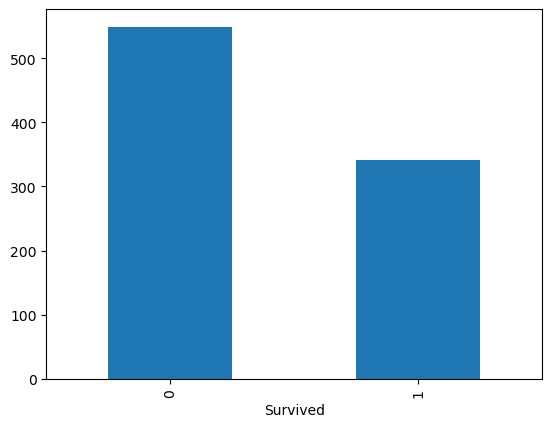

In [19]:
train_data['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='survive'>

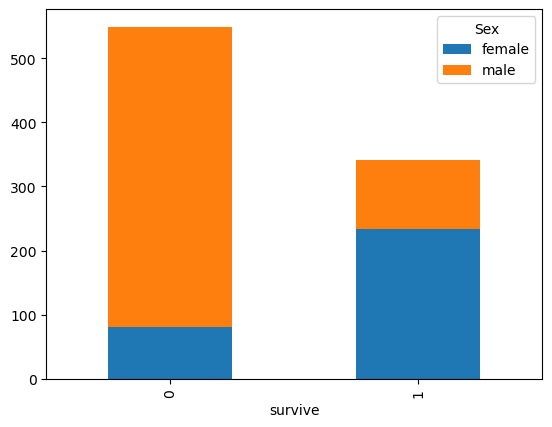

In [24]:
pd.crosstab(train_data['Survived'], train_data['Sex']).plot(kind='bar', stacked=True, xlabel='survive')

<Axes: xlabel='Pclass'>

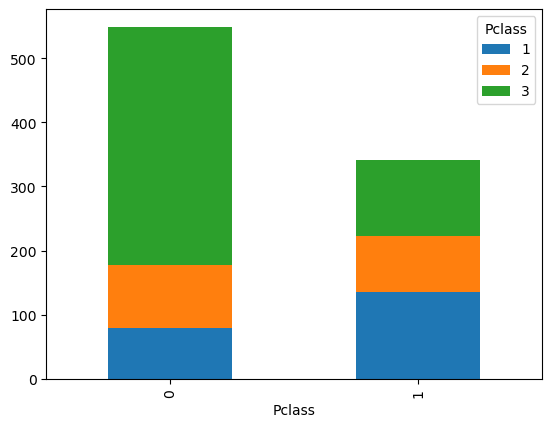

In [25]:
pd.crosstab(train_data['Survived'], train_data['Pclass']).plot(kind='bar', stacked=True, xlabel='Pclass')

### Transform data

In [97]:
featuers = 'Survived ~ C(Pclass)+C(Sex)+Age+Fare+Embarked'
Y, X = dmatrices(featuers, data=train_data, return_type='dataframe')

test_data['Survived'] = 1 # add dummy label for test dataset
Y_test, X_test = dmatrices(featuers, data=test_data, return_type='dataframe')

Y = Y.values.flatten()

print(X.head(2))

   Intercept  C(Pclass)[T.2]  C(Pclass)[T.3]  C(Sex)[T.male]  Embarked[T.Q]  \
0        1.0             0.0             1.0             1.0            0.0   
1        1.0             0.0             0.0             0.0            0.0   

   Embarked[T.S]   Age     Fare  
0            1.0  22.0   7.2500  
1            0.0  38.0  71.2833  


c:\Users\miche\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\miche\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\miche\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\miche\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\miche\anaconda3\Lib

### Train model

In [105]:
model = LogisticRegression()
model.fit(X, Y)


c:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Evaluate model

In [99]:
print(list(zip(X.columns, model.coef_.flatten())))
a_score = model.score(X, Y)
print(a_score)



[('Intercept', 1.56119487622041), ('C(Pclass)[T.2]', -0.8783824098345275), ('C(Pclass)[T.3]', -2.078831198618265), ('C(Sex)[T.male]', -2.387264082321088), ('Embarked[T.Q]', -0.5786589714618489), ('Embarked[T.S]', -0.4064205864726232), ('Age', -0.031964155309371696), ('Fare', 0.00124110795104693)]
0.7949438202247191


### Predit on test dataset

In [103]:
Y_test = model.predict(X_test).astype(int)
print(Y_test[:500])

[0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0
 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0]



### Output

In [107]:

df = pd.DataFrame(Y_test)
df.to_csv('./data/titanic/submission.csv',index = False, header=True)

## Precision Recall curve

[[0.8876922  0.1123078 ]
 [0.08524086 0.91475914]
 [0.45193304 0.54806696]]
(712, 2)


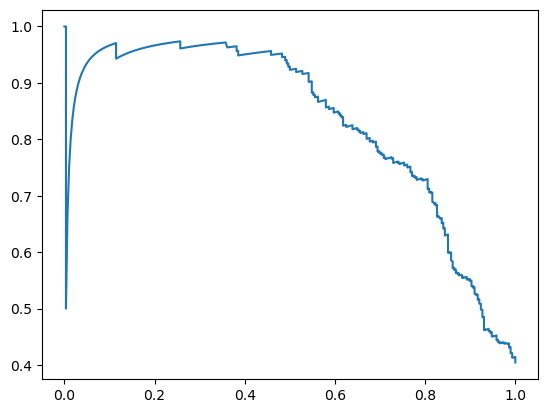

[0.02211229 0.02345662 0.02625077 0.03505204 0.03732489 0.04159908
 0.04767109 0.04771031 0.04772723 0.04920116 0.05023932 0.05226738
 0.05383538 0.05394612 0.0557067  0.0570688  0.05716774 0.05723969
 0.05898059 0.0589892  0.05954624 0.06067545 0.06078872 0.06260307
 0.06261035 0.06266531 0.06268414 0.06447346 0.0649982  0.06600623
 0.06648783 0.06804548 0.06850177 0.06979792 0.07037424 0.07049853
 0.07056735 0.07062979 0.0718481  0.07269524 0.07400905 0.07420111
 0.07484272 0.0748771  0.07553781 0.07628655 0.07704691 0.07705352
 0.07713521 0.07851125 0.07930062 0.07944157 0.08001982 0.08178514
 0.0817964  0.08186712 0.08194605 0.08225089 0.08298136 0.08338808
 0.08422542 0.0842294  0.0842322  0.08424417 0.08427409 0.08499401
 0.08671607 0.08673082 0.08801757 0.08827332 0.08900021 0.08922822
 0.08929337 0.08930894 0.08945541 0.09012487 0.09183903 0.09191454
 0.0919249  0.09194303 0.09209166 0.09209339 0.09369575 0.09413461
 0.09461971 0.09462591 0.09463034 0.09463344 0.09480105 0.0954

In [128]:

Y_prob = model.predict_proba(X)
print(Y_prob[:3])
print(Y_prob.shape)

# thresholds = list(range(0.4, 1, 0.05))
# for threshold in thresholds:
#     y_predict = [1 if y >= threshold else 0 for y in Y_prob]

precision, recall, thresholds = precision_recall_curve(Y, Y_prob[:,1])
plt.plot(recall, precision)
plt.xlabel = 'recall'
plt.ylabel = 'precision'
plt.show()
print(thresholds)